## Importar las Librerías
* Utilizamos la **librería `pandas`** para la manipulación y análisis de datos.
* Usamos la **librería `sklearn`** para construir y evaluar modelos de aprendizaje automático.

## [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
> Modelo de aprendizaje automático basado en árboles de decisión, diseñado para predecir **valores continuos**. Este modelo divide el conjunto de datos en ramas más pequeñas y profundas para aprender relaciones complejas y mejorar la precisión de las predicciones.



In [60]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from Biblioteca import EstadisticaDescriptiva  

### Cargar y Leer el Fichero de Datos:
* Definimos la ruta del fichero de datos y la almacenamos en la variable **`wine_file_path`**.
* Utilizamos el método **`pd.read_csv()`** de la librería [pandas](https://pandas.pydata.org/) para leer el contenido del fichero y almacenar los datos en la variable **`wine_data`**.
* **`wine_data`** contendrá el **DataFrame** con todos los datos del archivo, listos para ser analizados y procesados.


In [61]:
wine_file_path = 'Wine_dataset.csv'
wine_data = pd.read_csv(wine_file_path)

## Análisis Inicial de los Datos:

* Antes de construir el modelo, es fundamental **entender la estructura de los datos** y verificar su calidad.
* Utilizamos dos métodos principales:

  - **`dataFrame.info()`**: Este método proporciona un **resumen detallado** del DataFrame, mostrando:
    - **Número de filas y columnas**.
    - **Tipos de datos** en cada columna.
    - **Cantidad de valores no nulos**, lo que nos permite detectar la **presencia de valores faltantes**.

  - **`dataFrame.describe()`**: Genera **estadísticas descriptivas** para las columnas numéricas, incluyendo:
    - **Media (`mean`)**.
    - **Desviación estándar (`std`)**.
    - **Mínimo (`min`)** y **máximo (`max`)**.
    - **Percentiles** (25%, 50%, 75%).


In [62]:
wine_data.info()
print("-------------------------------------------------------------")
wine_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Definición de Variables:
>*La correcta elección de estas características es fundamental para **mejorar la capacidad predictiva** del modelo.*
* **Variable `y`**: Corresponde al valor objetivo o **target**, que es la variable que deseamos predecir.
  - En este caso, representa la **clase del vino** que queremos identificar basándonos en sus características químicas.
* **Variable `x`**: Contiene las características seleccionadas, también conocidas como **features** las cuales se utilizarán como entradas para el modelo.
  - Las características relevantes seleccionadas:
    - `Proanthocyanins`
    - `Proline`
    - `OD280/OD315 of diluted wines`
    - `Flavanoids`
    - `Total phenols`

In [63]:
y = wine_data['class']
wine_features = ['Proanthocyanins', 'Proline ', 'OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols']
x = wine_data[wine_features]


## Entrenamiento del Modelo:
* Se utiliza la función **`train_test_split`** de la librería [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
* Esta función divide el conjunto de datos en dos partes:
  - **Datos de Entrenamiento (80%)**: Utilizados para ajustar el modelo y aprender los patrones subyacentes.
  - **Datos de Validación (20%)**: Empleados para evaluar el rendimiento del modelo y verificar la capacidad de generalización.
* La función permite especificar el parámetro **`random_state`** para garantizar que la división sea reproducible y consistente.


In [64]:
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state= 1)

## Modelo de Regresión con DecisionTreeRegressor:
* Creamos una instancia de un modelo de **Árbol de Decisión** utilizando `DecisionTreeRegressor`, con el fin de capturar patrones en datos complejos ya que se adapta bien a relaciones no lineales.

## Entrenamiento del Modelo con los Datos de Entrenamiento:
* Entrenamos el modelo denominado **`wine_model`** mediante el uso del método `fit()`, utilizando:
  - **`train_x`**: Conjunto de características de entrenamiento.
  - **`train_y`**: Valores objetivo (etiquetas) correspondientes.
* El objetivo del entrenamiento es **ajustar el modelo** a los datos para que pueda realizar **predicciones precisas** sobre nuevos conjuntos de datos.


In [65]:
wine_model = DecisionTreeRegressor(random_state=1)
wine_model.fit(train_x, train_y)

DecisionTreeRegressor(random_state=1)


## Predicciones:
* Después de entrenar el modelo con los datos de entrenamiento, realizamos **predicciones** usando el conjunto de datos de validación. 
* Estas predicciones nos permiten evaluar el rendimiento del modelo y comprobar qué tan bien se ajusta a los datos no vistos.
* Podemos compararlas con los valores reales para calcular métricas de evaluación como la **Accuracy** y el **Error Absoluto Medio (MAE)**.


In [66]:
predictions = wine_model.predict(val_x)
print("PREDICCIONES:")
print(predictions)
print('------------------------------------------')
print('Uvas almacenadas:')
print(val_y)
print('MAE:')
print(f'{mean_absolute_error(val_y, predictions) * 100}%')

PREDICCIONES:
[3. 2. 1. 2. 1. 3. 2. 1. 3. 2. 1. 1. 2. 1. 2. 2. 3. 1. 2. 1. 1. 2. 3. 1.
 1. 3. 1. 1. 1. 3. 2. 2. 3. 1. 2. 2. 2. 2. 2. 1. 1. 3. 3. 2. 1.]
------------------------------------------
Uvas almacenadas:
161    3
117    2
19     1
69     2
53     1
138    3
112    2
14     1
160    3
107    2
11     1
4      1
108    2
42     1
84     2
113    2
152    3
35     1
105    2
31     1
51     1
126    2
130    3
73     2
40     1
162    3
47     1
29     1
16     1
147    3
97     2
159    3
151    3
5      1
120    2
94     2
91     2
81     2
114    2
48     1
54     1
59     2
165    3
39     1
56     1
Name: class, dtype: int64
MAE:
8.88888888888889%



## Accuracy:

>La **Accuracy** es una medida de rendimiento que indica el **nivel de acierto del modelo**. Se expresa en un rango de **`0`** a **`1`** , donde:

- **`0`** representa que el modelo no tiene ningún acierto.
- **`1`** representa que el modelo tiene un **acierto total**.

La fórmula general utilizada para calcular la Accuracy es: 
**`Accuracy = Número de Predicciones Correctas / Total de Predicciones`**


In [67]:
accuracy = accuracy_score(val_y, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9111111111111111


## Análisis Estadístico Usando la Biblioteca Personalizada

### Aplicamos la biblioteca personalizada para calcular las siguientes métricas estadísticas:

- **Media Aritmética**: Valor promedio de todos los datos.
- **Mediana**: Valor que divide el conjunto de datos en dos partes iguales.
- **Percentiles (25, 50 y 75)**: Valores que indican las posiciones relativas en el conjunto de datos.
- **Varianza**: Mide la dispersión de los datos respecto a la media.
- **Desviación Típica**: Indica qué tan dispersos están los valores respecto a la media.
- **Resumen Estadístico Completo**: Proporciona una visión general de todas las métricas anteriores .


In [68]:
print('------------------------------------------')
print()

prueba1 = EstadisticaDescriptiva()

resumen = prueba1.resumenEstadistico(predictions)

print("Resumen Estadístico:")
for clave, valor in resumen.items():
    print(f"{clave}: {valor}")
print()
print('------------------------------------------')

------------------------------------------

Resumen Estadístico:
Media Aritmética: 1.8222222222222222
Mediana: 2.0
Mínimo: 1.0
Máximo: 3.0
Percentil 25: 1.0
Percentil 50: 2.0
Percentil 75: 2.0
Varianza: 0.5906172839506172
Desviación Típica: 0.7685162873684703

------------------------------------------


Matriz de confusión

Matriz de Confusión:
[[17  1  0]
 [ 1 15  1]
 [ 0  1  9]]
---------------------


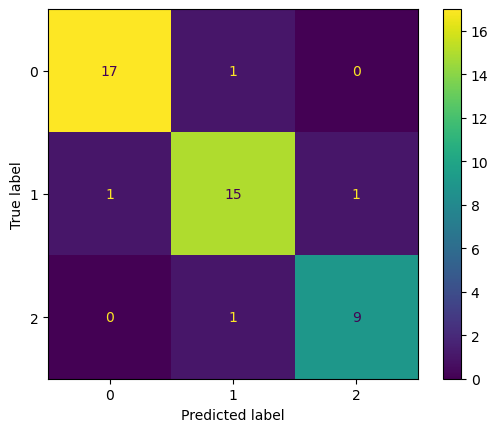

In [69]:
conf_matrix = confusion_matrix(val_y, predictions)

print("Matriz de Confusión:")
print(conf_matrix)
print("---------------------")

visualizar = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
visualizar.plot()

plt.show()


# Utilizando lo anteriormente explicado, aquí pueden observar el entrenamiento de tres modelo diferentes:

## Código completo modelo 1: Utilizando `DecisionTreeRegressor`


> Es un modelo de **regresión basado en árboles de decisión**. Utiliza un conjunto de **reglas de decisión** para dividir el dataset en subconjuntos más pequeños y realizar predicciones basadas en los valores promedio de cada rama.

### ✔️ Ventajas:
- **Rápido y fácil de interpretar**.
- **Soporta tanto datos numéricos como categóricos**.

### ❌ Desventajas:
- **Propenso a sobreajuste** en datasets pequeños.
- **Sensibilidad a variaciones en los datos de entrenamiento**.

### Parámetros clave:
- **`max_depth`**: Profundidad máxima del árbol.
- **`min_samples_split`**: Mínimo de muestras requeridas para dividir un nodo.
- **`random_state`**: Control de reproducibilidad.


PREDICCIONES:
[3. 2. 1. 2. 1. 3. 2. 1. 3. 2. 1. 1. 2. 1. 2. 2. 3. 1. 2. 1. 1. 2. 3. 1.
 1. 3. 1. 1. 1. 3. 2. 2. 3. 1. 2. 2. 2. 2. 2. 1. 1. 3. 3. 2. 1.]
------------------------------------------
Uvas almacenadas:
161    3
117    2
19     1
69     2
53     1
138    3
112    2
14     1
160    3
107    2
11     1
4      1
108    2
42     1
84     2
113    2
152    3
35     1
105    2
31     1
51     1
126    2
130    3
73     2
40     1
162    3
47     1
29     1
16     1
147    3
97     2
159    3
151    3
5      1
120    2
94     2
91     2
81     2
114    2
48     1
54     1
59     2
165    3
39     1
56     1
Name: class, dtype: int64
MAE:
8.88888888888889%
Accuracy: 0.9111111111111111
------------------------------------------
Resumen Estadístico de las Predicciones:
Media Aritmética: 1.8222222222222222
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.5906172839506173
Desviación Típica: 0.7685162873684703
-------------------------------------

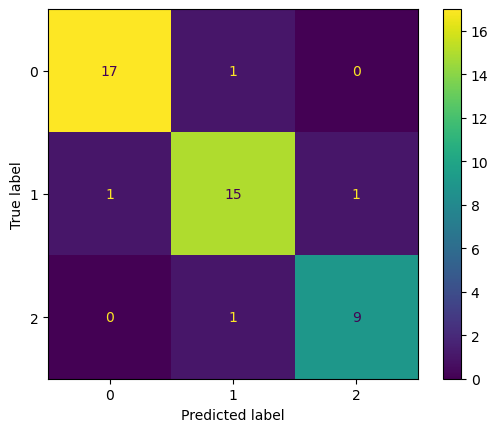

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from Biblioteca import EstadisticaDescriptiva  

wine_file_path = 'Wine_dataset.csv'
wine_data = pd.read_csv(wine_file_path)

y = wine_data['class']
wine_features = ['Proanthocyanins', 'Proline ', 'OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols']
x = wine_data[wine_features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

wine_model = DecisionTreeRegressor(random_state=1)

wine_model.fit(train_x, train_y)

predictions = wine_model.predict(val_x)

print("PREDICCIONES:")
print(predictions)
print('------------------------------------------')
print('Uvas almacenadas:')
print(val_y)
print('MAE:')
print(f'{mean_absolute_error(val_y, predictions) * 100}%')

predictions_int = list(map(int, predictions)) 
accuracy = accuracy_score(val_y, predictions_int)
print("Accuracy:", accuracy)

print('------------------------------------------')

prueba1 = EstadisticaDescriptiva()

resumen = prueba1.resumenEstadistico(predictions_int)

print("Resumen Estadístico de las Predicciones:")
for clave, valor in resumen.items():
    print(f"{clave}: {valor}")

print('------------------------------------------')
conf_matrix = confusion_matrix(val_y, predictions_int)

print("Matriz de Confusión:")
print(conf_matrix)
print('------------------------------------------')

visualizar = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
visualizar.plot()

plt.show()
    

## Código completo modelo 2: Utilizando `RandomForestRegressor`

> Es un algoritmo de **regresión basado en árboles de decisión**. Combina múltiples árboles de decisión independientes para obtener un **modelo más robusto** y **reducir el riesgo de sobreajuste**.

### ✔️ Ventajas:
- **Capacidad de manejar relaciones no lineales**.
- **Reducción de la varianza** y menor riesgo de overfitting.

### ❌ Desventajas:
- **Más lento** y computacionalmente **costoso** en comparación con otros modelos simples.
- **Difícil de interpretar** debido a la complejidad del ensamble.

### Parámetros clave:
- **`n_estimators`**: Número de árboles en el bosque.
- **`max_depth`**: Profundidad máxima de cada árbol.
- **`random_state`**: Controla la reproducibilidad de los resultados.


PREDICCIONES:
[3.   2.   1.02 2.09 1.   3.   2.   1.01 2.99 2.02 1.02 1.45 2.   1.
 2.   2.   2.88 1.   2.   1.   1.   2.   2.9  1.   1.05 3.   1.   1.14
 1.03 3.   2.   2.51 2.73 1.   1.97 2.02 2.09 1.61 2.   1.   1.   2.78
 3.   1.48 1.  ]
------------------------------------------
Uvas almacenadas:
161    3
117    2
19     1
69     2
53     1
138    3
112    2
14     1
160    3
107    2
11     1
4      1
108    2
42     1
84     2
113    2
152    3
35     1
105    2
31     1
51     1
126    2
130    3
73     2
40     1
162    3
47     1
29     1
16     1
147    3
97     2
159    3
151    3
5      1
120    2
94     2
91     2
81     2
114    2
48     1
54     1
59     2
165    3
39     1
56     1
Name: class, dtype: int64
MAE:
10.244444444444444%
Accuracy: 0.8222222222222222
------------------------------------------
Resumen Estadístico de las Predicciones:
Media Aritmética: 1.6444444444444444
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.

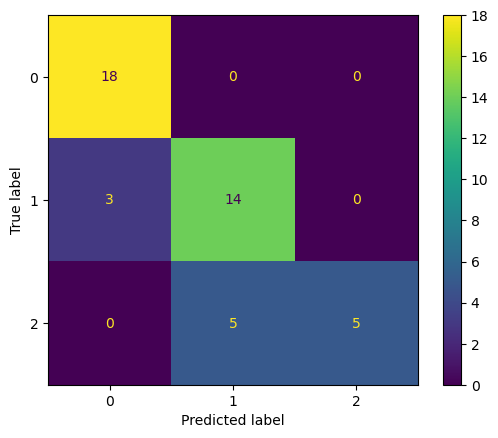

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from Biblioteca import EstadisticaDescriptiva  

wine_file_path = 'Wine_dataset.csv'
wine_data = pd.read_csv(wine_file_path)

y = wine_data['class']
wine_features = ['Proanthocyanins', 'Proline ', 'OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols']
x = wine_data[wine_features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

wine_model2 = RandomForestRegressor(random_state=1)

wine_model2.fit(train_x, train_y)

predictions2 = wine_model2.predict(val_x)

print("PREDICCIONES:")
print(predictions2)
print('------------------------------------------')
print('Uvas almacenadas:')
print(val_y)
print('MAE:')
print(f'{mean_absolute_error(val_y, predictions2) * 100}%')

predictions_int2 = list(map(int, predictions2)) 
accuracy2 = accuracy_score(val_y, predictions_int2)
print("Accuracy:", accuracy2)

print('------------------------------------------')

prueba2 = EstadisticaDescriptiva()

resumen2 = prueba2.resumenEstadistico(predictions_int2)

print("Resumen Estadístico de las Predicciones:")
for clave, valor in resumen2.items():
    print(f"{clave}: {valor}")

print('------------------------------------------')
conf_matrix = confusion_matrix(val_y, predictions_int2)

print("Matriz de Confusión:")
print(conf_matrix)
print('------------------------------------------')

visualizar = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
visualizar.plot()

plt.show()
    

## Código completo modelo 3: Utilizando `KNeighborsRegressor`

> Es un algoritmo de **aprendizaje supervisado** basado en la proximidad de los puntos de datos. Se utiliza principalmente para tareas de **regresión**.

### ✔️ Ventajas:
- **Sencillo y fácil de entender**.
- **Bueno para pequeñas cantidades de datos**.

### ❌ Desventajas:
- **Sensible a valores atípicos**.
- **Ineficiente en grandes datasets** debido a su **complejidad computacional** (`O(n)`).

### Parámetros clave:
- **`n_neighbors`**: Número de vecinos a considerar.
- **`weights`**: Asigna pesos a los vecinos (`uniform`, `distance`).
- **`algorithm`**: Método para calcular los vecinos (`auto`, `ball_tree`, `kd_tree`, `brute`).



PREDICCIONES:
[1.8 2.  2.2 2.8 1.  2.2 2.8 1.  2.8 2.2 1.  2.6 2.  1.  2.4 2.  2.2 1.4
 2.  1.  1.  2.  2.2 1.2 1.8 2.2 1.2 1.  1.  2.2 2.2 2.4 2.4 1.  2.2 2.
 2.  2.8 2.  1.  1.  2.8 2.8 2.2 1.2]
------------------------------------------
Uvas almacenadas:
161    3
117    2
19     1
69     2
53     1
138    3
112    2
14     1
160    3
107    2
11     1
4      1
108    2
42     1
84     2
113    2
152    3
35     1
105    2
31     1
51     1
126    2
130    3
73     2
40     1
162    3
47     1
29     1
16     1
147    3
97     2
159    3
151    3
5      1
120    2
94     2
91     2
81     2
114    2
48     1
54     1
59     2
165    3
39     1
56     1
Name: class, dtype: int64
MAE:
38.666666666666664%
Accuracy: 0.6888888888888889
------------------------------------------
Resumen Estadístico de las Predicciones:
Media Aritmética: 1.6444444444444444
Mediana: 2
Mínimo: 1
Máximo: 3
Percentil 25: 1
Percentil 50: 2
Percentil 75: 2
Varianza: 0.451358024691358
Desviación Típica: 0.67183184

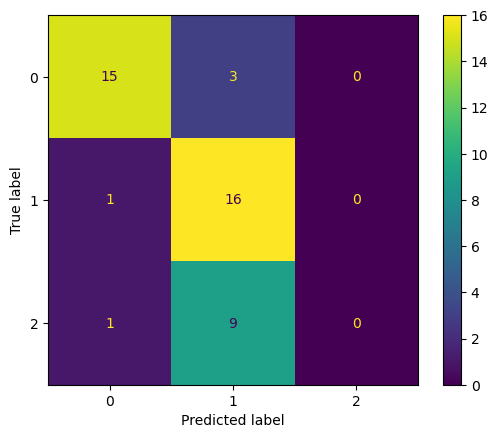

In [75]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from Biblioteca import EstadisticaDescriptiva  

wine_file_path = 'Wine_dataset.csv'
wine_data = pd.read_csv(wine_file_path)

y = wine_data['class']
wine_features = ['Proanthocyanins', 'Proline ', 'OD280/OD315 of diluted wines', 'Flavanoids', 'Total phenols']
x = wine_data[wine_features]

train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=1)

wine_model3 = KNeighborsRegressor(n_neighbors=5) # no tiene el parametro random_state 

wine_model3.fit(train_x, train_y)

predictions3 = wine_model3.predict(val_x)

print("PREDICCIONES:")
print(predictions3)
print('------------------------------------------')
print('Uvas almacenadas:')
print(val_y)
print('MAE:')
print(f'{mean_absolute_error(val_y, predictions3) * 100}%')

predictions_int3 = list(map(int, predictions3)) 
accuracy3 = accuracy_score(val_y, predictions_int3)
print("Accuracy:", accuracy3)

print('------------------------------------------')

prueba3 = EstadisticaDescriptiva()

resumen3 = prueba3.resumenEstadistico(predictions_int3)

print("Resumen Estadístico de las Predicciones:")
for clave, valor in resumen2.items():
    print(f"{clave}: {valor}")

print('------------------------------------------')
conf_matrix = confusion_matrix(val_y, predictions_int3)

print("Matriz de Confusión:")
print(conf_matrix)
print('------------------------------------------')

visualizar = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
visualizar.plot()

plt.show()